<a href="https://colab.research.google.com/github/nicholasrichers/regressao-neuron/blob/master/pt2_Regressao_na_Pratica_Bootcamp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%capture
!pip install mlxtend==0.17.3
!pip install pycaret==2.0
!pip install h2o

# Regressão na prática

O que iremos abordar:

- Quando aplicar? 
- Diferencas entre técnicas de regressão e classificação
- Introdução a técnicas de regressão






---



---



## Conjunto de dados

Nesse treinamento vamos usar um dataset muito conhecido na literatura, chamado [boston housing](https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html), que usa **dados demograficos/socioeconômicos** da região para **prever a mediana dos preços das casas** em cada região da cidade.



-CRIM — Taxa de **crime** per capita por cidade

-ZN — **Proporção de lotes** residenciais num raio de 25,000 pés quadrados

-INDUS — **Proporção de acres** para negócios que não são varejo por cidade

-CHAS — **Proximidade com o rio** (1 se o lote está na margem  do rio, 0 se não)

-NOX — **Concentração** de **óxidos** nítricos (partes por 10 milhões)

-RM — Numero médio de **quartos** por residência

-AGE — Proporção de **unidades construídas** antes de **1940**

-DIS — **Distância** ponderada dos cinco grandes **centros** de trabalho

-RAD — Índice de **acessibilidade** à estradas radiais

-TAX — Razão de **imposto** sobre valor total da propriedade

-PTRATIO — Razão de **alunos por professor** na cidade

-LSTAT — % porcentagem de **status inferior** da população

-MEDV — **Valor mediano das casas** ocupadas em milhares


In [2]:
#impotando a biblioteca pandas
import pandas as pd

In [3]:
#url onde o dataset está armazenado
url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"

#importando o dataset para o pandas
df = pd.read_csv(url)

#dimensão do dataset
print("O dataset possui {} linhas (registros) e {} colunas (features)".format(df.shape[0], df.shape[1]))

O dataset possui 506 linhas (registros) e 14 colunas (features)


> **Uma amostra do dataset**

In [4]:
df.head(10) 

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


> **Estatistica descritiva dos atributos**

In [5]:
 df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000




---



---



## Analisando o conjunto de dados

In [6]:
#Importando Bibliotecas 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


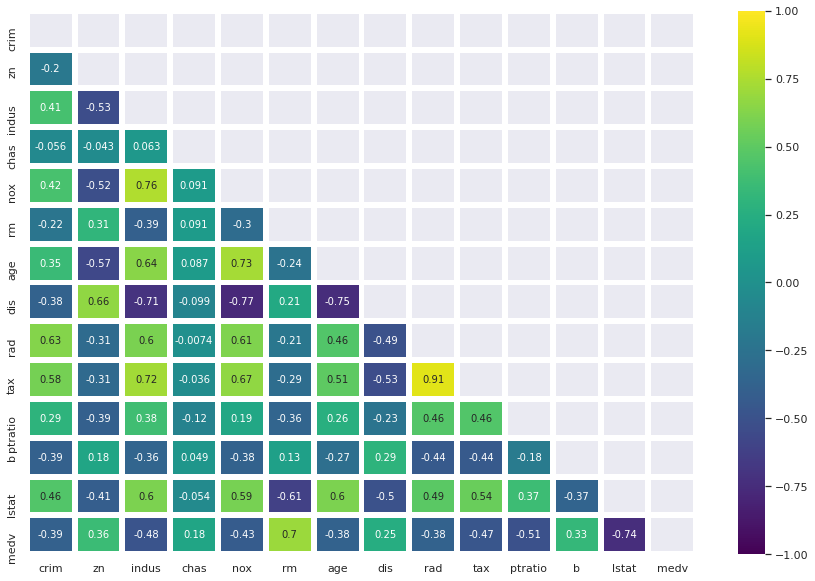

In [7]:
# Aqui estamos calculando a matriz de correlação
corr=df.corr(method='pearson') # É possivel definir o método 

# Desenvolvendo o gráfico de correlação 
np.triu ( np.ones ( corr.shape , dtype  =  bool ))
mask  =  np.triu ( np.ones ( corr.shape , dtype  =  bool ))
fig = plt.gcf() 
figsize = fig.get_size_inches()
fig.set_size_inches(figsize * 2.5)
sns.set(font_scale=1)
sns.heatmap(corr, annot=True, mask  =  mask , annot_kws={"size": 10} ,cmap="viridis",linewidths=5, vmin=-1, vmax=1)



---



---



# Dividindo o conjunto de dados 





> **Train/Test Split** 

Após a peparação e compreensão do conjunto de dados, entramos na primeira parte da análise propiamente dita, onde é realizada a divisão do conjunto de dados em treino e teste.
A etapa de treino consiste na apresentação dos padrões dos dados ao algoritmo, é nesta etapa que este vai tentar aprender. A proxima etapa é a de teste, esta objetiva avaliar se realmente o algoritmo aprendeu os padrões e com isso é possivel identificar a presença de overfitting ou underfitting.

In [8]:
# Vetor de resposta
Y = df['medv']

# Vetor característica
X = df['rm']

Aqui ocorreu a divisão do banco de dados, onde 70% dos dados foram destinados ao teste e 30% ao treino.

In [9]:
from sklearn.model_selection import train_test_split

# Dividindo o banco de dados em treino e teste
treino_Y, teste_Y, treino_X, teste_X = train_test_split(Y, X, test_size = 0.30)

In [10]:
#Aqui verificamos os tamanhos dos bancos de dados de treino e teste
print('Tamanho do banco de dados de treino de Y:', treino_Y.shape)
print('Tamanho do banco de dados de teste de Y:', teste_Y.shape)
print('Tamanho do banco de dados de treino de X:', treino_X.shape)
print('Tamanho do banco de dados de teste de X:', teste_X.shape)

Tamanho do banco de dados de treino de Y: (354,)
Tamanho do banco de dados de teste de Y: (152,)
Tamanho do banco de dados de treino de X: (354,)
Tamanho do banco de dados de teste de X: (152,)




---



---



# Tipos de regressão

### Linear simples

*(incluir aqui uma explicação teorica bem básica de regressão linear simples)*

> **Regressão linear na mão** (*from scratch*)


Estimando Coeficientes :
b_0 = -36.73808818328092  \ 
b_1 = 9.437559535504635


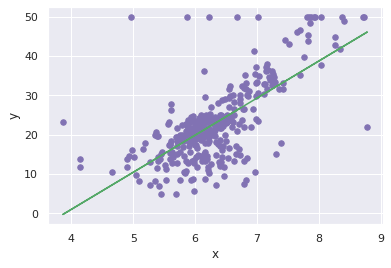

In [11]:
def estimate_coef(x, y): 
  # número de observações
   n = np.size(x) 
   m_x, m_y = np.mean(x), np.mean(y) 
   SS_xy = np.sum(y*x) - n*m_y*m_x 
   SS_xx = np.sum(x*x) - n*m_x*m_x
   b_1 = SS_xy / SS_xx 
   b_0 = m_y - b_1*m_x 
   return(b_0, b_1)

def plot_regression_line(x, y, b): 
    plt.scatter(x, y, color = "m", marker = "o", s = 30)
    y_pred = b[0] + b[1]*x

    plt.plot(x, y_pred, color = "g")
    plt.xlabel('x') 
    plt.ylabel('y') 
    plt.show()


def main(): 
    # observations 
    x = np.array(treino_X) 
    y = np.array(treino_Y) 
  
    # estimando os coeficientes 
    b = estimate_coef(x, y) 
    print("Estimando Coeficientes :\nb_0 = {}  \ \nb_1 = {}".format(b[0], b[1]))

    #funcao que cria o grafico
    plot_regression_line(x, y, b) 

if __name__ == "__main__": 
    main() 



---



---



> **Usando** [sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

treino_X = np.array(treino_X)
treino_Y = np.array(treino_Y)
teste_X = np.array(teste_X)
teste_Y = np.array(teste_Y)

regr_simples = LinearRegression()

#ajustando o modelos
regr_simples.fit(treino_X.reshape(-1, 1), treino_Y.reshape(-1, 1))

#criando as predicoes
preds_regr_simples = regr_simples.predict(teste_X.reshape(-1, 1))

#imprimindo os coeficientes
print("Intercept: \n", regr_simples.intercept_)
print('Coefficients: \n', regr_simples.coef_)

#imprimindo as metricas
print('Mean squared error: %.2f'% mean_squared_error(teste_Y, preds_regr_simples))
print('Coefficient of determination (R2): %.2f'% r2_score(teste_Y, preds_regr_simples))

Intercept: 
 [-36.73808818]
Coefficients: 
 [[9.43755954]]
Mean squared error: 32.35
Coefficient of determination (R2): 0.48


> **Plotando o nosso modelo**


Caso queira aprender mais sobre matplotlib, temos um [treinamento](https://github.com/nicholasrichers/dataviz-neuron/blob/master/Treinamento_Dataviz.ipynb) específico para essa biblioteca

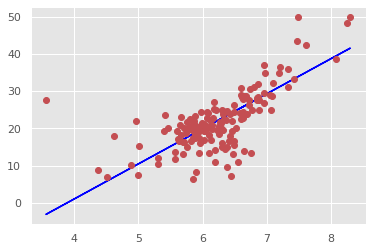

In [13]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

#Predicoes do modelo regr_simples na celula acima
plt.plot(teste_X, preds_regr_simples, color="blue")

#Amotras de teste (vermelho)
plt.plot(teste_X, teste_Y, 'ro')


plt.show()



---



---



### Regressão Múltipla

A  nossa análise pode **melhorar** muito se **incluirmos** as demais **features** em nossa análise, faremos isso usando **regressão múltipla**. Existem algumas maneiras diferentes para **estimarmos os coeficientes** e falaremos de duas delas.

In [14]:
#Usaremos o mesmo target
Y = df['medv']

#Nossa matriz de features usará todas as colunas do dataframe exceto o target
X = df.iloc[:, :-1]

#refazendo o split
y_train, y_test, X_train, X_test = train_test_split(Y, X, test_size = 0.30)



---



---



> **Método dos Mínimos Quadrados (Ordinary Least Squares - OLS)**


Descrição:

Esse procedimento busca minimizar a soma do quadrados dos resíduios e dessa forma estimar uma solução única para o vetor de parâmetros ($b$). Partindo do nosso problema original temos que:

>$y=X.b$ (1)

Onde $X$ é a nossa matriz de features, $y$ é o preço estimado das casas e $b$, o vetor de coefientes que precisamos estimar. Extendendo a eq. (1), temos que:

> $X^{T} . y = X^{T}. X.b $ (2)

Onde bastou multiplicartmos ambos os lados por $X^{T}$. Em seguida desenvolvendo a eq. (2) algebricamente e isolando $b$, temos:


> $b = (X^{T} . X)^{-1} . X^{T} . y$ (3)


Note que $(X^{T} . X)^{-1} . X^{T}$, é conhecida como a [pseudo-inversa](https://en.wikipedia.org/wiki/Moore%E2%80%93Penrose_inverse) de $X$.

Finalmente, usaremos a eq. (3) para estimar nosso vetor $b$, onde:


```
np.linalg.inv(X_train.T.dot(X_train))
```
Representa $(X^{T} . X)^{-1} $


In [15]:
#Determinando b pelo método OLS, manualmente
b = np.linalg.inv(X_train.T.dot(X_train)).dot(X_train.T).dot(y_train) #(eq.3)

#Coeficientes
print("Coeficientes: {}".format(b))

#Gerando as predições
preds_ols = X_test.dot(b)

Coeficientes: [-8.90445236e-02  5.42211388e-02  7.01807710e-03  3.95195863e+00
 -3.07821664e+00  5.87865400e+00  2.53025353e-03 -9.21020022e-01
  1.69866447e-01 -9.74256292e-03 -3.67498131e-01  1.36138695e-02
 -4.54600340e-01]




---



---



> **Usando skelarn**

A função [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html), também usa o método OLS.

In [16]:
# Mesmo exemplo de uma variável usando sklearn
#criando o nosso modelo como todos os parametros "Default"
reg_ols = LinearRegression()

#treinando o model
reg_ols.fit(X_train, y_train)

#Coeficientes
print("Coeficientes: {}".format(reg_ols.coef_))
print("Intercept: {}".format(reg_ols.intercept_))


#salvando nossas predicoes
preds_ols_sklearn = reg_ols.predict(X_test)

#Avaliando o modelo (R^2)
print("R2: {}".format(reg_ols.score(X_test, y_test)))

Coeficientes: [-1.05991499e-01  5.27855562e-02  5.51241590e-02  3.66769064e+00
 -1.77957833e+01  3.60506874e+00  1.00945451e-02 -1.39560812e+00
  3.14793058e-01 -1.31881962e-02 -9.82091033e-01  7.87122461e-03
 -5.74802255e-01]
Intercept: 38.31671752711902
R2: 0.7768337514106163


Regressão Simples (RM): **R2: 0.59**



---



---



> **Método de Descida Gradiente (Gradient Descent)**

*( bom resumo abaixo)*

Gradient descent is an optimization algorithm used to find the values of parameters (coefficients) of a function (f) that minimizes a cost function (cost).

Gradient descent is best used when the parameters cannot be calculated analytically (e.g. using linear algebra) and must be searched for by an optimization algorithm.


When there are one or more inputs you can use a process of optimizing the values of the coefficients by iteratively minimizing the error of the model on your training data.

This operation is called Gradient Descent and works by starting with random values for each coefficient. The sum of the squared errors are calculated for each pair of input and output values. A learning rate is used as a scale factor and the coefficients are updated in the direction towards minimizing the error. The process is repeated until a minimum sum squared error is achieved or no further improvement is possible.

When using this method, you must select a learning rate (alpha) parameter that determines the size of the improvement step to take on each iteration of the procedure.


Gradient descent is often taught using a linear regression model because it is relatively straightforward to understand. In practice, it is useful when you have a very large dataset either in the number of rows or the number of columns that may not fit into memory.



![picture](https://miro.medium.com/max/379/0*-j3BGxc-EJDOddim)

> **Stochastic Gradient Descent**

Como a regressão linear é feita usando o método OLS, aqui vamos usar o [SGDRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html#sklearn.linear_model.SGDRegressor) ... 


(explicar a diferenca usando gradiente estocástico, ver doc do sklearn no link logo acima)

ao inves de ajustar com todo o dataset para dar 1 passo, ele ajusta para cada registro (linha de X), e da um passo menor

In [17]:
from sklearn.linear_model import SGDRegressor

reg_sgd = SGDRegressor()

#treinando o model
reg_sgd.fit(X_train, y_train)

#Coeficientes
print("Coeficientes: {}".format(reg_sgd.coef_))
print("Intercept: {}".format(reg_sgd.intercept_))


#salvando nossas predicoes
preds_sgd_sklearn = reg_sgd.predict(X_test)

#Avaliando o modelo (R^2)
print("R2: {}".format(reg_sgd.score(X_test, y_test)))

Coeficientes: [-6.80709356e+10  1.89276875e+11  5.12906072e+11 -2.87794133e+10
  2.06000471e+10  8.81502354e+10 -2.96667108e+11 -2.22281103e+11
  6.16723253e+11  7.90276700e+10  1.41870786e+10 -1.03664508e+11
  1.09716462e+11]
Intercept: [6.45335685e+09]
R2: -8.588544852847438e+24


Perceba que o resultado acima do R2 foi terrível, e foi necessária alguma investigação para entender o motivo...



---



---



(Foi necessário fazer um stantard scaler na matriz X, para o algoritmo convergir...)


usamos o std scaler para que o subespaco tenha o shape ovalado do gif acima

In [18]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()


X_train_scaled = std.fit_transform(X_train)
X_test_scaled = std.fit_transform(X_test)

#treinando o model
reg_sgd.fit(std.fit_transform(X_train_scaled), y_train)

#Coeficientes
print("Coeficiente: {}".format(reg_sgd.coef_))
print("Intercept: {}".format(reg_sgd.intercept_))

#salvando nossas predicoes
preds_sdg_scaled = reg_sgd.predict(X_test_scaled)

#Avaliando o modelo (R^2)
print("R2: {}".format(reg_sgd.score(X_test_scaled, y_test)))

Coeficiente: [-0.85743912  0.96319832 -0.09153949  0.95217843 -1.64825835  2.70156665
  0.17201396 -2.61248606  1.58784136 -1.08819748 -1.99572963  0.71549376
 -4.05877597]
Intercept: [22.62658956]
R2: 0.7749224962327838


Regressão OLS: **R2: 0.75**

> Obs: Além das duas formulações acima, poderíamos estimar os coeficientes estimando a **máxima verossimilhança**, não cobriremos esse método nesse treinamento, mas há uma excelente fonte inicial [aqui](https://machinelearningmastery.com/linear-regression-with-maximum-likelihood-estimation/). 



---



---



### Métricas

> **Como comparar os modelos usando essas métricas**

- Representacao teórica (formula)
- Breve explicacao do que ela representa
- Possiveis desvantagens

In [19]:
# Acho que não precisa criar código manual, usar make_scorer do skelarn a metrica padrao .score() é o r2

In [20]:
# compare os 2 modelos do sklearn, o reg_ols e o reg_sgd

 Parte 1 gabriela até aqui (entre 60 e 75 min)
 Avaliar se vale a pena fz pausa para perguntas ou descanso



---



---



> **Intepretação dos modelos (análise dos resíduos)**

O métodos dos **mínimos quadrados** pressupõe que o resíduo $e(t) = y(t) − y_{pred}(t)$ tem **distribuição normal, média nula e variância constante**. Esta hipótese implica implicitamente que **processo é estacionário**, ou seja, que as características estatísticas do processo se mantêm estáveis.

![picture](https://github.com/nicholasrichers/regressao-neuron/blob/master/img/analise_residuos.png?raw=true)

[Fonte](https://ensinandomaquinasblog.wordpress.com/)

Agora vamos observar a distribuição da **densidade** dos erros dos 3 modelos que desenvolvemos até aqui.

In [21]:
#resíduo Regressão simples
resid_simples = preds_regr_simples.ravel() - y_test

#resíduo OLS
resid_ols = preds_ols_sklearn - y_test

#resíduo SGD
resid_sgd = preds_sdg_scaled - y_test


#salvando esses resultdos numa lista iterável
resids = [resid_simples, resid_ols, resid_sgd]

Perceba que a premissa que onde **média dos resíduos é zero**, tende a ser **menos provável** a medida que a **dimensionalidade** do dataset **aumenta**, dessa forma, perceba que o modelo linear simples possui um aspecto mais próximo a normal, mesmo sendo um modelo inferior em relação ao $R^{2}$.

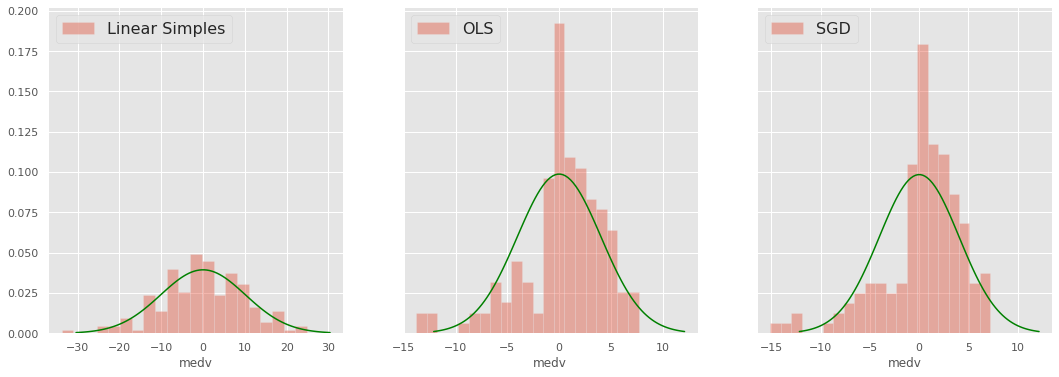

In [22]:
import scipy.stats as stats

legend = ["Linear Simples", "OLS", "SGD"]

#criando a imagem
fig, axes = plt.subplots(1, 3, sharey=True, figsize=(18,6))
for i, res in enumerate(resids):

  #Histograma de densidade
  sns.distplot(res, bins=21, norm_hist=True, kde=False, ax=axes[i])

  #Distribuião normal com média nula e std constante
  mu, sigma = 0, res.std()

  #plotando a normal
  x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
  axes[i].legend([legend[i]], loc = 'upper left', fontsize=16)
  axes[i].plot(x, stats.norm.pdf(x, mu, sigma), color = "green")


plt.show()

> Como melhorar?

- Transformaçoes nos dados (MinMax & StandardScaler)
- Otimização de hiperparâmetros
- Remoção de Outliers
- Remoção de variáveis muito correlacionadas



---



---



## Regressão Polinomial

Outra presunção forte da regressão linear é considerar uma **relação linear** das variáveis de entrada e saída.

In [23]:
#selecionei 5 colunas para facilitar a visualização
cols = ["rm", "age", "tax" , "lstat", "medv"]

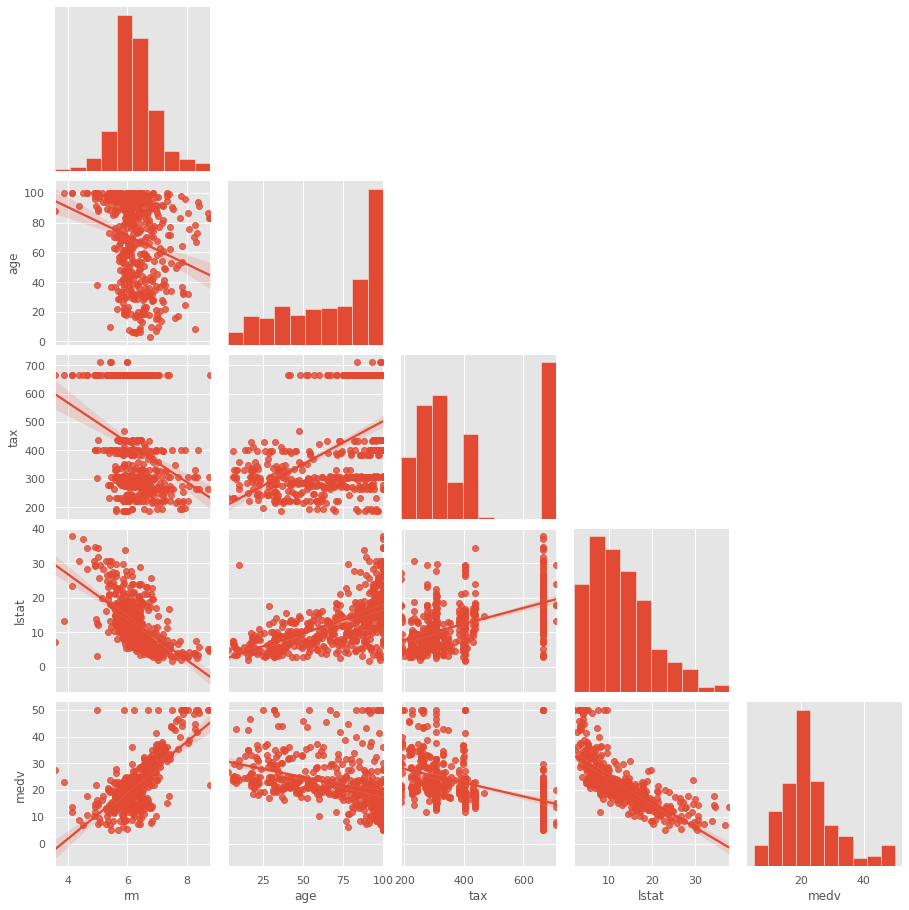

In [24]:
sns.pairplot(df[cols], corner=True, kind="reg") 

Podemos ver na última linha do `pairplot`, que essa hipótese **não é verdadeira para todas as features**, em especial a variável `lstat`. Além disso, é fácil supor que a adição de **mais features** ao modelo torna essa hipótese ainda **mais difícil** de se manter.



---



---



> Observe o relacionamento entre um **par de variáveis**, para **diferentes** **graus**, $y= X^1$; $y= X^3$: $y= X^{20}$.



![picture](https://miro.medium.com/max/700/1*zOl_ztYqnzyWRkBffeOsRQ.png)




Obs: Os **modelos** acima ainda são considerados **lineares**, porque os **coeficientes**  associados as features ainda são **lineares**, mesmo que a curva que estamos ajustando for quadrática por natureza.



---



---



> Agora, vamos criar um modelo **polinomial** com a ajuda do [sklearn](https://scikit-learn.org/stable/modules/linear_model.html#polynomial-regression-extending-linear-models-with-basis-functions). Imagine uma matriz ($P$) de features com **duas colunas** ($x_{1}$ e $x_{2}$) de entrada e apenas **3 registros**.

In [25]:
P = np.arange(6).reshape(3, 2)
P

array([[0, 1],
       [2, 3],
       [4, 5]])

As features ($x_{1}$ e $x_{2}$) de $P$, foram **transformadas** para a forma:

($x_{1}$ e $x_{2}$) $->$ ($1, x_{1}, x_{2}, x_{1}^{2}, x_{1}x_{2}, x_{2}^{2}$)

In [26]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
poly.fit_transform(P)

array([[ 1.,  0.,  1.,  0.,  0.,  1.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.]])

Vamos **repetir** esse mesmo **procedimento** para os dados de **treino e teste**, do nosso conjunto de dados de imóveis. Note que criamos uma função para facilitar a repetição do procedimento para diferentes `degrees`.

In [27]:
from sklearn.preprocessing import PolynomialFeatures

def create_polynomial_regression_model(degree, get_data=False):
  "Creates a polynomial regression model for the given degree"
  
  poly_features = PolynomialFeatures(degree=degree)
  
  # transforms the existing features to higher degree features.
  X_train_poly = poly_features.fit_transform(X_train)
  X_test_poly = poly_features.fit_transform(X_test)

  #return my poly_data
  if get_data==True: return X_train_poly, X_test_poly
  
  # fit the transformed features to Linear Regression
  poly_model = LinearRegression()
  poly_model.fit(X_train_poly, y_train)
  
  # predicting on training data-set
  y_train_predicted = poly_model.predict(X_train_poly)
  
  # predicting on test data-set
  y_test_predict = poly_model.predict(X_test_poly)

  #salvando nossas predicoes
  preds_sdg_sklearn = reg_sgd.predict(X_test)
    
  # evaluating the model on training dataset
  mse_train = mean_squared_error(y_train, y_train_predicted)
  r2_train = r2_score(y_train, y_train_predicted)
  
  # evaluating the model on test dataset
  mse_test = mean_squared_error(y_test, y_test_predict)
  r2_test = r2_score(y_test, y_test_predict)
  
  print("The model performance for the training set")
  print("-------------------------------------------")
  print("MSE of training set is {:.3f}".format(mse_train))
  print("R2 score of training set is {:.3f}".format(r2_train))
  
  print("\n")
  
  print("The model performance for the test set")
  print("-------------------------------------------")
  print("MSE of test set is {:.3f}".format(mse_test))
  print("R2 score of test set is {:.3f}".format(r2_test))

> `degree=1`: Chegamos a um resultado **similar** ao que criamos anteriormente, percerba que há uma pequena perda de performance, do treino, para o teste, como o esperado.

In [28]:
create_polynomial_regression_model(1)

The model performance for the training set
-------------------------------------------
MSE of training set is 24.546
R2 score of training set is 0.725


The model performance for the test set
-------------------------------------------
MSE of test set is 16.282
R2 score of test set is 0.777


> `degree=2`: Houve um signigicativo **ganho de performance** em relação ao anterior, tanto para o treino, como para o teste. Contudo, perceba que a diferença entre treino e teste aumentou um pouco em relação a `degree=1`.

In [29]:
create_polynomial_regression_model(2)

The model performance for the training set
-------------------------------------------
MSE of training set is 7.231
R2 score of training set is 0.919


The model performance for the test set
-------------------------------------------
MSE of test set is 13.860
R2 score of test set is 0.810


> `degree=3`: As métricas `RMSE=0` e `R2=1`, indicam que o modelo **acertou** o valor de todo o conjunto de **treino**, contudo, teve uma performance **terrível** para o conjunto de **teste**, o que indica que o nosso modelo não conseguiu generalizar o problema e de alguma forma "**decorou**" o conjunto de treino e não consegue acertar no conjunto de teste. Isso significa o mesmo que **overfiting**.

In [30]:
create_polynomial_regression_model(3)

The model performance for the training set
-------------------------------------------
MSE of training set is 0.000
R2 score of training set is 1.000


The model performance for the test set
-------------------------------------------
MSE of test set is 26576.606
R2 score of test set is -363.272




---



---



## Bias & Variancia

Relacionane a **legenda** da primeira imagem com a segunda.

![picture](https://miro.medium.com/max/700/1*zOl_ztYqnzyWRkBffeOsRQ.png)

![picture](https://qph.fs.quoracdn.net/main-qimg-ed02a43e7c32e81171ba5f7eecb06334)

> Como calcular o **Bias e a Variância**

A formula da estimativa do erro em função do viés e da variância pode ser obtida dessa forma.

$(1) Erro(x) = (Y - fhat(x))$

$(2) Erro(x) = E[(Y - fhat(x))^{2}]$

$(3) Erro(x) = E[fhat(x) - f(x)]^{2} + E[fhat(x) - E(fhat(x))^{2}] + \sigma^{2}$

$(4) Erro(x) = Bias^{2} + Variancia + Ruido $

Felizmente, não precisamos realizar esse cálculo manualmente, podemos usar a função [bias_variance_decomp](http://rasbt.github.io/mlxtend/user_guide/evaluate/bias_variance_decomp/) da biblioteca MLxtend.

In [31]:
# estimate the bias and variance for a regression model
from mlxtend.evaluate import bias_variance_decomp
import re

def bias_variance(model, X_train, X_test, y_train, y_test):

  # Nome do modelo
  name = re.findall("^.{0,10}", str(model))[0]

  # estima bias and variance (MLxtend nao aceita pandas dataframe) 
  mse, bias, var = bias_variance_decomp(model, 
                                        X_train, 
                                        y_train, 
                                        X_test, 
                                        y_test, 
                                        loss='mse', 
                                        num_rounds=200, 
                                        random_seed=42)

  
  # summarize results
  print('Model Name: ', name)
  print('MSE: %.3f' % mse)
  print('Bias: %.3f' % bias)
  print('Variance: %.3f' % var)

> `degree=1`: Alto bias e baixa variância.

In [32]:
#transformando a matriz de features em uma funcao polinomial
X_train_poly, X_test_poly = create_polynomial_regression_model(1, get_data=True)

#modelo que iremos usar
model= LinearRegression()

#calculando o bias e a variância
bias_variance(model, X_train_poly, X_test_poly,  y_train.values, y_test.values)

Model Name:  LinearRegr
MSE: 17.736
Bias: 16.189
Variance: 1.547


> `degree=2`: Diminuiu o bias e aumentou variância.

In [33]:
#transformando a matriz de features em uma funcao polinomial
X_train_poly, X_test_poly = create_polynomial_regression_model(2, get_data=True)

#calculando o bias e a variância
bias_variance(model, X_train_poly, X_test_poly,  y_train.values, y_test.values)

Model Name:  LinearRegr
MSE: 489.962
Bias: 11.517
Variance: 478.445


> `degree=3`: Bias e variância muito altos.

In [34]:
#transformando a matriz de features em uma funcao polinomial
X_train_poly, X_test_poly = create_polynomial_regression_model(3, get_data=True)


#calculando o bias e a variância
bias_variance(model, X_train_poly, X_test_poly,  y_train.values, y_test.values)

Model Name:  LinearRegr
MSE: 4144.385
Bias: 195.537
Variance: 3948.849


Obs: Lembre que os **valores** obtidos acima foram para o conjunto de **dados de teste**.



---



---



## Regularização

A partir do experimento acima podemos perceber que há um **tradeoff** entre o **erro** e a **complexidade** **do modelo**.

> **Bias & Variance Tradeoff**

![picture](https://miro.medium.com/max/492/1*kADA5Q4al9DRLoXck6_6Xw.png)

> Uma maneira eficiente de **controlarmos** a **complexidade** do modelo, e ainda **reduzirmos o Bias**, é através da **regularização**.

Voltando ao exemplo onde:
($x_{1}$ e $x_{2}$) $->$ ($1, x_{1}, x_{2}, x_{1}^{2}, x_{1}x_{2}, x_{2}^{2}$)

Para  o caso onde em $x_{1}$ observássemos um relacionamento **quadrático** com o alvo e em $x_{2}$ um relacionamento **linear**, a melhor função que mapearia os nossos dados seria do tipo ($1, x_{2}, x_{1}^{2}$). Contudo esse tipo de inferência, além de **pouco prática** e propensa a overfiting, incorre em problemas como [data snooping](https://work.caltech.edu/library/173.html). Uma vez que é necessário "bisbilhotar" os dados e passar essa informação direto pro modelo.




---



---



> **Modelos lineares com regularização**


A maneira correta de controlarmos a complexidade do modelo é através da **regularização**, que a grosso modo **penaliza** os **maiores** **coeficientes**. A seção de [modelos lineares](https://scikit-learn.org/stable/modules/linear_model.html#) da documentação do sklearn, é uma excelente fonte para entender o funcionamento dos modelos e obter alguns exemplos.

> Formalizando **regressao linear (OLS)**, temos:

$\min_{w} || X w - y||_2^2$

Onde $w = (w_1, ..., w_p)$, são os nossos **coeficientes**, que minimizam a soma do quadrado dos residuos. 


$|| X w - y||_2$ é a [l2-norm](https://medium.com/@montjoile/l0-norm-l1-norm-l2-norm-l-infinity-norm-7a7d18a4f40c) do vetor resultante.

ou

$sqrt(|a|^{2} + |b|^{2} + |c|^{2} + ...)$




> Vamos criar uma função para repetirmos esse procedimento para os diversos modelos. Note que a única coisa que precisamos mudar na chamada da função é o próprio modelo.

In [35]:
def train_linear_model(model, X_train, X_test,  y_train, y_test, print_coef=True):

  
  #calculando o bias e a variância
  bias_variance(model, X_train, X_test,  y_train, y_test) 

  #não printar com notação científica
  np.set_printoptions(suppress=True)


  #treinando e avaliando o modelo (R^2)
  model.fit(X_train, y_train)
  print("R2: {:.3f}".format(model.score(X_test, y_test)))
  #print("MSE: {}".format(mean_squared_error(y_test, model.predict(X_test))))

  #Coeficientes
  if print_coef==True:  
    print("---------------------")
    print("Intercept: {:.3f}".format(model.intercept_))
    print("Coeficientes: {}".format(np.round(model.coef_,3)))
    

In [36]:
from sklearn.linear_model import LinearRegression

train_linear_model(LinearRegression(), X_train.values, X_test.values,  y_train.values, y_test.values)

Model Name:  LinearRegr
MSE: 17.736
Bias: 16.189
Variance: 1.547
R2: 0.777
---------------------
Intercept: 38.317
Coeficientes: [ -0.106   0.053   0.055   3.668 -17.796   3.605   0.01   -1.396   0.315
  -0.013  -0.982   0.008  -0.575]




---



---



> **Ridge Regressor**


A componente de **regularização** é uma **extensão** do método OLS. O parâmetro de regularização $\alpha \geq 0$ **controla a penalização**. Quanto maior o valor de $\alpha$, maior a penalização para a complexidade, portanto os coeficientes se tornam mais **robustos à colinearidade**.


>> $\min_{w} || X w - y||_2^2 + \alpha ||w||_2^2$

Agora precisamos minimizar $||w||_2^2$, a soma dos valores valores absolutos dos coeficientes ao quadrado.

In [37]:
from sklearn.linear_model import Ridge

train_linear_model(Ridge(), X_train.values, X_test.values,  y_train.values, y_test.values)

Model Name:  Ridge()
MSE: 17.840
Bias: 16.322
Variance: 1.517
R2: 0.774
---------------------
Intercept: 32.738
Coeficientes: [-0.103  0.054  0.015  3.567 -9.574  3.63   0.004 -1.28   0.296 -0.014
 -0.889  0.008 -0.59 ]


Obs: Perceba que usando o sklearn, a única variável que precisamos alterar é o próprio modelo.



---



---



> **Lasso Regression**

Modifica o modelos OLS, porém utiliza a [l1-Norm](https://medium.com/@montjoile/l0-norm-l1-norm-l2-norm-l-infinity-norm-7a7d18a4f40c) ou $(|a| + |b| + |c| + ...)$.



>>$\min_{w} { \frac{1}{2n_{\text{samples}}} ||X w - y||_2 ^ 2 + \alpha ||w||_1}$


O modelo Lasso tende a estimar **coeficientes esparsos**, ou sejam com poucos coeficientes diferentes de zero, o que pode ser útil na **presença de variáveis não informativas**.

In [38]:
from sklearn.linear_model import Lasso

train_linear_model(Lasso(),  X_train.values, X_test.values,  y_train.values, y_test.values)

Model Name:  Lasso()
MSE: 22.235
Bias: 20.992
Variance: 1.243
R2: 0.710
---------------------
Intercept: 43.995
Coeficientes: [-0.077  0.056 -0.     0.    -0.     0.61   0.034 -0.635  0.283 -0.015
 -0.758  0.007 -0.827]




---



---



> **ElasticNet**


Esse modelo é treinado usando a regularização **l1 e l2**, onde temos poucos pesos diferentes de zero, porém mantendo as propriedade de regularização do Ridge.



>>$\min_{w} { \frac{1}{2n_{\text{samples}}} ||X w - y||_2 ^ 2 + \alpha \rho ||w||_1 +
\frac{\alpha(1-\rho)}{2} ||w||_2 ^ 2}$


O Elasticnet é útil quando há várias features correlacionadas. O modelo Lasso provavelmente escolherá um desses aleatoriamente, enquanto Elasticnet provavelmente escolherá ambos.

In [39]:
from sklearn.linear_model import ElasticNet

train_linear_model(ElasticNet(),  X_train.values, X_test.values,  y_train.values, y_test.values)

Model Name:  ElasticNet
MSE: 21.519
Bias: 20.492
Variance: 1.028
R2: 0.719
---------------------
Intercept: 43.271
Coeficientes: [-0.09   0.06  -0.     0.    -0.     0.826  0.032 -0.723  0.313 -0.016
 -0.77   0.007 -0.811]




---



---



> **Otimização de hiperparâmetros**


Agora vamos observar o comportamento do hiperparâmetro $\alpha$, na performance dos modelos com regularização.

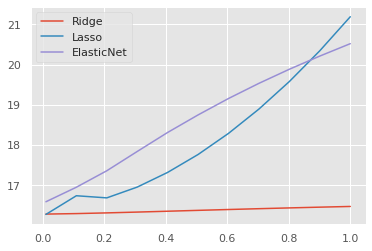

In [40]:
#declarando um dicionário de modelos
models=dict()
models["Ridge"] = Ridge()
models["Lasso"] = Lasso()
models["ElasticNet"] = ElasticNet()
#models["LassoLars"] = LassoLars()

#uma lista com 10 valores alpha entre (0.01 e 1)
alphas =  np.linspace(0.01,1,11)

#iterando dentro dos modelos e valores de alpha
for name, model in models.items():
  mse=list()
  for alpha in alphas:

    #configurado o parâmetro alpha
    model.set_params(**{'alpha': alpha})

    #treinando o model
    model.fit(X_train, y_train)

    #salvando o resultado do mse
    mse.append(mean_squared_error(y_test, model.predict(X_test)))

  plt.plot(alphas, mse, label='%s' % name)

plt.legend()
plt.show()



---



---



### Regressao stepwise (seleção de variáveis)





Perceba que ao zerar o coeficiente de uma feature, temos o mesmo efeito de eliminar a coluna referente da matriz de features (X). Na regressão stepwise, adicionamos ou retiramos features iterativamente de maneira [gulosa](https://en.wikipedia.org/wiki/Greedy_algorithm), a fim de encontrar uma combinação de colunas sub-ótima.

> **Least Angle Regression**


Em cada etapa, ele encontra a feature mais correlacionada ao target, ou ao resíduo do target. Em caso de haver mais de uma ele segue uma direção equiangular entre essas features.


>> **Vantagens**:

- Computacionamente eficiente
- Robusto a multicolineariedade e alta dimensionalidade
- Pode ser combinado a outros algoritmos (ex. LARSLasso)



>> **Desvantagens:**

- Por usar uma solução gulosa, na maioria dos casos teremos **resultados sub-ótimos**.
- Como o modelo refaz o **ajuste** usando os **resíduos**, o **erro** pode **extrapolar** na presença de **ruído**.


In [41]:
from sklearn.linear_model import Lars

train_linear_model(Lars(),  X_train.values, X_test.values,  y_train.values, y_test.values)

Model Name:  Lars()
MSE: 18.076
Bias: 16.217
Variance: 1.860
R2: 0.777
---------------------
Intercept: 38.317
Coeficientes: [ -0.106   0.053   0.055   3.668 -17.796   3.605   0.01   -1.396   0.315
  -0.013  -0.982   0.008  -0.575]


> Outras Maneiras

- Orthogonal Matching Pursuit ([OMP](https://scikit-learn.org/stable/modules/linear_model.html#orthogonal-matching-pursuit-omp))
- Recursive Feature Elimination ([RFE](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html))





---



---





### Regressão Robusta

> **RANSAC (RANdom SAmple Consensus)**

O algoritmo divide os dados completos da amostra de entrada em um conjunto de "inliners", e ajusta um modelo para um subconjunto dessas amostras repetidas vezes. Esse modelo pode ser usado em problemas não lineares.


![picture](https://scikit-learn.org/stable/_images/sphx_glr_plot_ransac_0011.png)

In [50]:
from sklearn.linear_model import RANSACRegressor

#train_linear_model(RANSACRegressor(),  X_train.values, X_test.values,  y_train.values, y_test.values)

ransac = RANSACRegressor()

#calculando o bias e a variância
bias_variance(model, X_train.values, X_test.values,  y_train.values, y_test.values) 

#treinando e avaliando o modelo (R^2)
ransac.fit(X_train, y_train)
print("R2: {:.3f}".format(ransac.score(X_test, y_test)))

Model Name:  Ridge(alph
MSE: 17.819
Bias: 16.301
Variance: 1.518
R2: 0.535




---



> **Variáveis polinomiais**

Agora vamos treinar os nossos modelos novamente, transformando a matriz de features (X), em uma função polinomial de grau 2. 

In [52]:
#transformando a matriz de features em uma funcao polinomial
X_train_poly, X_test_poly = create_polynomial_regression_model(2, get_data=True)

models=dict()

models["LinearRegression"] = LinearRegression()
models["Ridge"] = Ridge(alpha=0.8)

#Os modelos abaixo não convegem
#models["Lasso"] = Lasso()
#models["ElasticNet"] = ElasticNet()
#models["Lars"] = Lars()



for model in models.values():
  print("\n####################################")
  train_linear_model(model, X_train_poly, X_test_poly,  y_train.values, y_test.values, print_coef=False)


####################################
Model Name:  LinearRegr
MSE: 489.962
Bias: 11.517
Variance: 478.445
R2: 0.810

####################################
Model Name:  Ridge(alph
MSE: 20.580
Bias: 9.946
Variance: 10.634
R2: 0.853




---



---



> Outros Modelos Lineares

- [SVM](https://scikit-learn.org/stable/modules/svm.html#regression)
- [Bayesian Regressor](https://scikit-learn.org/stable/modules/linear_model.html#bayesian-regression)
- [Generalized Linear Regression](https://scikit-learn.org/stable/modules/linear_model.html#generalized-linear-regression)


> Critérios para escolher modelos lineares pela [documentação](https://scikit-learn.org/stable/modules/linear_model.html) do sklearn (são 17 modelos).

- Dimensionalidade
- Multicolineariedade
- Esparsidade
- Número de registros
- Nivel de ruido
- Presença de Outliers
- Outros...



---



---



## Modelos de regressao não linear (arvores e knn)

In [44]:
# plot knn https://medium.com/analytics-vidhya/k-neighbors-regression-analysis-in-python-61532d56d8e4



---



---



# Comparacao de modelos com Auto ML

> **Student Dataset**

Agora iremos usar um dataset diferente, precisamos prever a nota final de um estudante em matemática, baseado em dados socioeconômicos.

[Link UCI](https://archive.ics.uci.edu/ml/datasets/student+performance)

[Descrição](https://github.com/nicholasrichers/regressao-neuron/blob/master/student_dataset/student.txt)

In [53]:
#student

dados_url = 'https://raw.githubusercontent.com/nicholasrichers/regressao-neuron/master/student_dataset/student-mat.csv'

data = pd.read_csv(dados_url, sep=";")

data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [56]:
#criei a coluna média das notas
data["media"] = (data["G1"] + data["G2"] + data["G3"])/3

#deletando as outras notas
data.drop(columns=["G1","G2","G3"], inplace=True)

data.shape

(395, 31)



---



---



> **Pycaret**

Pycaret é uma excelente **ferramenta** para usar em **conjunto** com o **sklearn**, esse [post](https://towardsdatascience.com/announcing-pycaret-2-0-39c11014540e) é uma otima introdução a essa biblioteca.

In [54]:
from pycaret.regression import *

#lista dos modelos disponiveis
#models()

In [57]:
%%time
# init setup
reg1 = setup(data, target = 'media') 

# validação cruzada 5-fold
best_specific = compare_models(fold=3, n_select = 5, blacklist = ['tr']) 

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
0,Extreme Gradient Boosting,2.6224,11.1810,3.3418,0.1495,0.3466,0.3488,0.0611
1,Random Forest,2.6311,11.2453,3.3529,0.1465,0.3511,0.3666,0.3466
2,CatBoost Regressor,2.6558,11.3402,3.3674,0.1397,0.3551,0.3717,1.8473
3,Gradient Boosting Regressor,2.7121,11.8430,3.4394,0.1047,0.3711,0.3679,0.0877
4,Bayesian Ridge,2.7689,12.0557,3.4712,0.0848,0.3733,0.4059,0.0181
5,AdaBoost Regressor,2.8056,12.2065,3.4934,0.0742,0.3649,0.3885,0.0970
6,Support Vector Machine,2.8218,12.3745,3.5155,0.0674,0.3768,0.4150,0.0126
7,Light Gradient Boosting Machine,2.7668,12.3816,3.5187,0.0612,0.3634,0.3764,0.0269
8,K Neighbors Regressor,2.8461,12.7188,3.5660,0.0378,0.3702,0.3994,0.0043
9,Elastic Net,2.9156,13.3282,3.6482,-0.0042,0.3901,0.4364,0.0049


CPU times: user 58.1 s, sys: 9.91 s, total: 1min 7s
Wall time: 58 s


In [58]:
best_specific[1]

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=6679, verbose=0, warm_start=False)

In [60]:
type(best_specific[1])

sklearn.ensemble._forest.RandomForestRegressor



---



---



> **H2O**

Agora se voce quer usar apenas uma ferramenta, o H2O é a ferramenta certa pra você. [Artigo Neuron](https://medium.com/@nicholasrichers/crie-modelos-de-machine-learning-em-menos-de-10-minutos-com-automl-d4ecf67fab02) sobre o H2O.

In [61]:
import h2o

h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.8" 2020-07-14; OpenJDK Runtime Environment (build 11.0.8+10-post-Ubuntu-0ubuntu118.04.1); OpenJDK 64-Bit Server VM (build 11.0.8+10-post-Ubuntu-0ubuntu118.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.6/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpvshfz9mc
  JVM stdout: /tmp/tmpvshfz9mc/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpvshfz9mc/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,04 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.1.2
H2O_cluster_version_age:,6 days
H2O_cluster_name:,H2O_from_python_unknownUser_yr5lxc
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.180 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"accepting new members, healthy"


In [62]:
dados_url = 'https://raw.githubusercontent.com/nicholasrichers/regressao-neuron/master/student_dataset/student-mat.csv'

data = h2o.import_file(dados_url)
data["media"] = (data["G1"] + data["G2"] + data["G3"])/3

type(data)

Parse progress: |█████████████████████████████████████████████████████████| 100%


h2o.frame.H2OFrame

In [63]:
data.describe()

Rows:395
Cols:34




,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,media
type,enum,enum,int,enum,enum,enum,int,int,enum,enum,enum,enum,int,int,int,enum,enum,enum,enum,enum,enum,enum,enum,int,int,int,int,int,int,int,int,int,int,real
mins,,,15.0,,,,0.0,0.0,,,,,1.0,1.0,0.0,,,,,,,,,1.0,1.0,1.0,1.0,1.0,1.0,0.0,3.0,0.0,0.0,1.3333333333333333
mean,,,16.69620253164557,,,,2.749367088607595,2.5215189873417736,,,,,1.4481012658227845,2.0354430379746833,0.3341772151898734,,,,,,,,,3.9443037974683564,3.235443037974683,3.1088607594936697,1.4810126582278482,2.291139240506329,3.5544303797468384,5.708860759493671,10.908860759493665,10.71392405063291,10.41518987341772,10.679324894514771
maxs,,,22.0,,,,4.0,4.0,,,,,4.0,4.0,3.0,,,,,,,,,5.0,5.0,5.0,5.0,5.0,5.0,75.0,19.0,19.0,20.0,19.333333333333332
sigma,,,1.2760427246056265,,,,1.0947351414285371,1.0882005458269433,,,,,0.6975047549086822,0.8392403464185556,0.7436509736062509,,,,,,,,,0.8966586076885046,0.9988620396657203,1.1132781740183422,0.8907414280909669,1.2878965924510932,1.3903033913095773,8.003095687108184,3.3191946715076686,3.7615046595560306,4.5814426109978434,3.6967856336770732
zeros,,,0,,,,3,2,,,,,0,0,312,,,,,,,,,0,0,0,0,0,0,115,0,13,38,0
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,GP,F,18.0,U,GT3,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,yes,no,no,4.0,3.0,4.0,1.0,1.0,3.0,6.0,5.0,6.0,6.0,5.666666666666667
1,GP,F,17.0,U,GT3,T,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,yes,yes,no,5.0,3.0,3.0,1.0,1.0,3.0,4.0,5.0,5.0,6.0,5.333333333333333
2,GP,F,15.0,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,yes,no,yes,yes,yes,no,4.0,3.0,2.0,2.0,3.0,3.0,10.0,7.0,8.0,10.0,8.333333333333334




---



---



> Auto-ML

Na [documentação](http://docs.h2o.ai/h2o/latest-stable/h2o-docs/automl.html), você encontrará que o AutoML só trabalha com algoritmos "top de linha", e a verdade é que você **não precisa se preocupar por enquanto**, como esses modelos funcionam a fundo.

1. Random Forest (**DRF**)
2. Extremely-Randomized Forest (**DRF/XRT**)
3. Generalized Linear Models (**GLM**)
4. XGBoost (**XGBoost**)
5. Gradient Boosting Machines (**GBM**)
6. Deep Neural Nets (**DeepLearning**)
7. **Stacked Ensembles**: One of all the models
8. **Stacked Ensembles**: Only the best models of each kind

In [64]:
from h2o.automl import H2OAutoML

aml = H2OAutoML(max_models = 10, #default = 10
                max_runtime_secs=300, #default = inf
                nfolds=3, #default = 5
                sort_metric = "MSE", #default = logloss
                seed = 1,  
                )

In [65]:
%%time
aml.train(x = data.columns[:-4],
          y = "media", 
          training_frame = data
          )

AutoML progress: |████████████████████████████████████████████████████████| 100%
CPU times: user 13.5 s, sys: 297 ms, total: 13.7 s
Wall time: 2min 26s


In [66]:
h2o.automl.get_leaderboard(aml, extra_columns = 'training_time_ms').head(20)

model_id,mse,mean_residual_deviance,rmse,mae,rmsle,training_time_ms
StackedEnsemble_BestOfFamily_AutoML_20200909_234202,10.3922,10.3922,3.22369,2.57376,0.328467,164
StackedEnsemble_AllModels_AutoML_20200909_234202,10.5254,10.5254,3.24429,2.58704,0.328545,155
XRT_1_AutoML_20200909_234202,10.7377,10.7377,3.27685,2.60651,0.337085,765
GBM_3_AutoML_20200909_234202,10.7851,10.7851,3.28407,2.60662,0.335052,221
GBM_grid__1_AutoML_20200909_234202_model_1,10.8136,10.8136,3.2884,2.61366,0.338903,111
GBM_1_AutoML_20200909_234202,10.8332,10.8332,3.29138,2.62379,0.332777,322
GBM_grid__1_AutoML_20200909_234202_model_2,10.9126,10.9126,3.30343,2.64505,0.345066,185
GBM_2_AutoML_20200909_234202,10.9949,10.9949,3.31586,2.64367,0.336992,276
XGBoost_grid__1_AutoML_20200909_234202_model_3,11.1124,11.1124,3.33353,2.64569,0.333737,141
GBM_4_AutoML_20200909_234202,11.1992,11.1992,3.34653,2.67373,0.340372,234




---



---



> **Análise do Modelo**

Uma vez que temos um modelo em mãos, podemos inclusive analisar mais a fundo suas previsões. Contudo o H2O gera **muitas informações** que **não são relevantes** para o problema em questão, então é importante saber os **conceitos** para interpretar a saída do modelo,

In [67]:
# Get model ids for all models in the AutoML Leaderboard
model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])

# Get the "All Models" Stacked Ensemble model
best = h2o.get_model([mid for mid in model_ids if "GBM_grid__1" in mid][0])

In [68]:
best

Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_grid__1_AutoML_20200909_234202_model_1


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,40.0,40.0,8799.0,5.0,6.0,5.975,8.0,17.0,12.875




ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 6.23449218365882
RMSE: 2.496896510402227
MAE: 1.9511422806148289
RMSLE: 0.26630967585102927
Mean Residual Deviance: 6.23449218365882

ModelMetricsRegression: gbm
** Reported on cross-validation data. **

MSE: 10.813562705143754
RMSE: 3.288398197473012
MAE: 2.613656299033004
RMSLE: 0.3389034274155832
Mean Residual Deviance: 10.813562705143754

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid
0,mae,2.6142101,0.20917338,2.416154,2.5935142,2.832962
1,mean_residual_deviance,10.817122,1.2763696,9.7317295,10.49636,12.223278
2,mse,10.817122,1.2763696,9.7317295,10.49636,12.223278
3,r2,0.17591463,0.15134402,0.20266265,0.012979872,0.3121014
4,residual_deviance,10.817122,1.2763696,9.7317295,10.49636,12.223278
5,rmse,3.285187,0.19236131,3.1195722,3.2398086,3.4961805
6,rmsle,0.33815542,0.029123519,0.3218023,0.32088378,0.3717802



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance
0,,2020-09-09 23:42:29,0.448 sec,0.0,3.692103,2.976724,13.631626
1,,2020-09-09 23:42:29,0.461 sec,5.0,3.364178,2.724725,11.317692
2,,2020-09-09 23:42:29,0.472 sec,10.0,3.123881,2.490377,9.758633
3,,2020-09-09 23:42:29,0.488 sec,15.0,2.975296,2.340079,8.852388
4,,2020-09-09 23:42:30,0.500 sec,20.0,2.826035,2.223905,7.986475
5,,2020-09-09 23:42:30,0.512 sec,25.0,2.707532,2.127547,7.330732
6,,2020-09-09 23:42:30,0.525 sec,30.0,2.614921,2.058625,6.837810
7,,2020-09-09 23:42:30,0.538 sec,35.0,2.538622,1.994365,6.444604
8,,2020-09-09 23:42:30,0.555 sec,40.0,2.496897,1.951142,6.234492



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,failures,2960.658936,1.000000,0.193961
1,absences,1330.377808,0.449352,0.087157
2,Mjob,934.319397,0.315578,0.061210
3,health,815.279724,0.275371,0.053411
4,goout,814.134949,0.274984,0.053336
5,reason,741.087524,0.250312,0.048551
6,Medu,652.612305,0.220428,0.042754
7,freetime,609.187927,0.205761,0.039910
8,Walc,604.402283,0.204145,0.039596
9,Fjob,579.893433,0.195866,0.037990



See the whole table with table.as_data_frame()




---



---

